In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
df_train = pd.read_csv("loan_dataset/loan-train.csv")

In [165]:
df_train 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [166]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [167]:
pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [168]:
pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


<AxesSubplot: >

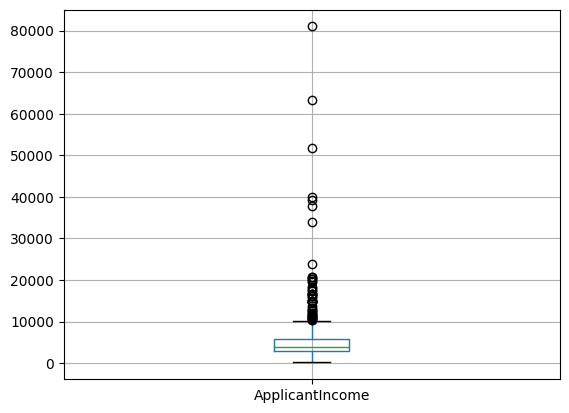

In [169]:
df_train.boxplot(column='ApplicantIncome')

<AxesSubplot: >

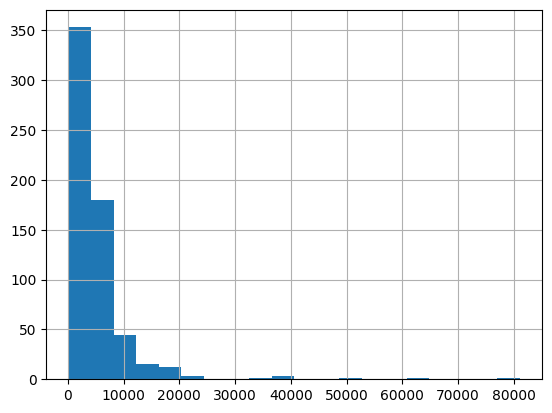

In [170]:

df_train['ApplicantIncome'].hist(bins = 20)


<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

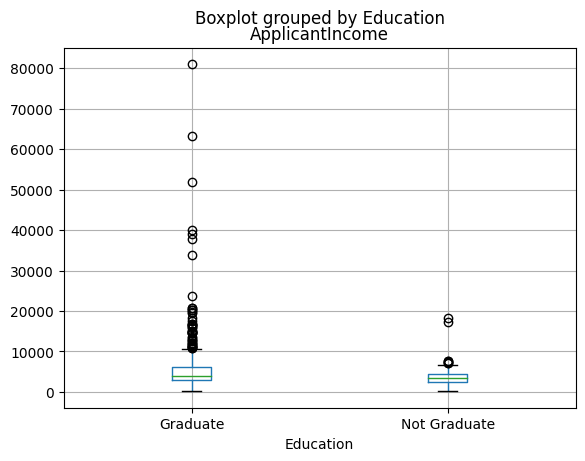

In [171]:
df_train.boxplot("ApplicantIncome",by="Education")

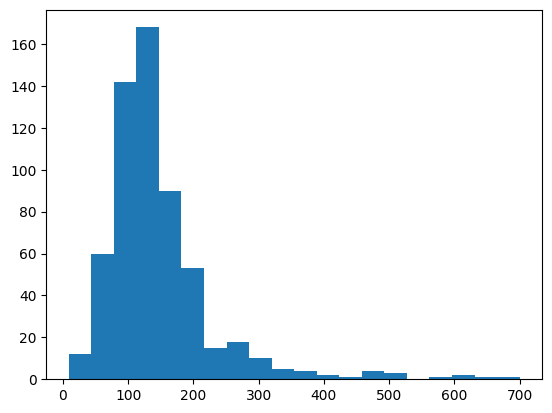

In [172]:
plt.hist(df_train['LoanAmount'],bins = 20)
plt.show()

 ## Handling Nulls

In [173]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [174]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)


In [175]:
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)


In [176]:
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)


In [177]:
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)


In [178]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])

<AxesSubplot: >

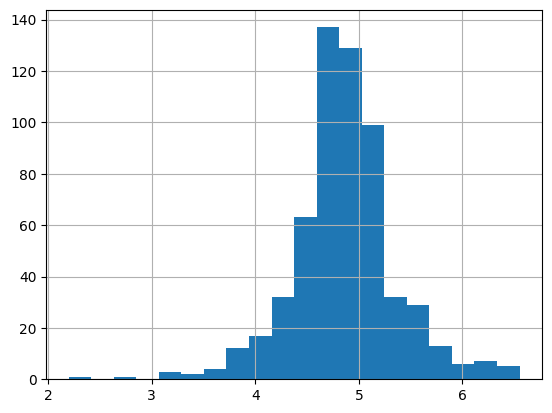

In [179]:
df_train['LoanAmount_log'].hist(bins =20)

In [180]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)

In [181]:
df_train['LoanAmount_log'].fillna(df_train['LoanAmount_log'].mean(),inplace=True)

In [182]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [183]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

In [184]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [185]:
df_train['TotalIncome']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
#df_train['TotalIncome_log']=np.log(df_train['TotalIncome'])

In [186]:
#df_train['TotalIncome_log'].hist(bins= 20)

In [187]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0


In [188]:
df2 = df_train
df2.drop(['ApplicantIncome','CoapplicantIncome'],inplace=True,axis=1)

In [189]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0


In [190]:
#Extracting input features
X = df2.iloc[:,np.r_[1:6,7:10,11:13]].values
X.shape

(614, 10)

In [192]:
#Extracting labels
y = df2.iloc[:,-3].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [194]:

from sklearn.preprocessing import LabelEncoder
encoder_x = LabelEncoder()
for i in range(0,6):
    X_train[:,i] = encoder_x.fit_transform(X_train[:,i])
X_train[:,7] = encoder_x.fit_transform(X_train[:,7])



In [195]:
encoder_y = LabelEncoder()
y_train= encoder_y.fit_transform(y_train)


In [196]:
for i in range(0,6):
    X_test[:,i] = encoder_x.fit_transform(X_test[:,i])
X_test[:,7] = encoder_x.fit_transform(X_test[:,7])

y_test= encoder_y.fit_transform(y_test)

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [198]:
#Choosing hyperparameters
from sklearn.model_selection import KFold, GridSearchCV

def hyperPMTuning(clsfr,params,Xtr = X_train, ytr = y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=clsfr, param_grid=params, cv=kf, scoring='accuracy')
    grid_search.fit(Xtr, ytr)
    return grid_search.best_params_


In [199]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(random_state=0)
DTparams = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 10,15,20, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4, 10]}
DT_best_params = hyperPMTuning(DT,DTparams)
DT_best_params


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [200]:

DT = DecisionTreeClassifier(criterion=DT_best_params['criterion'],max_depth= DT_best_params['max_depth'],min_samples_leaf= DT_best_params['min_samples_leaf'] , min_samples_split= DT_best_params['min_samples_split'], random_state=0)
DT.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=0)

In [201]:
y_predDT = DT.predict(X_test)

In [202]:
#Function to calculate Confusion matrix, accuracy and plot
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
def visualise(clsfr,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_pred,y_test)
    
    sns.heatmap(cm,annot=True)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.suptitle("{}\nAccuracy : {}%".format(clsfr.__class__.__name__,round(acc,3)*100))
    plt.show()

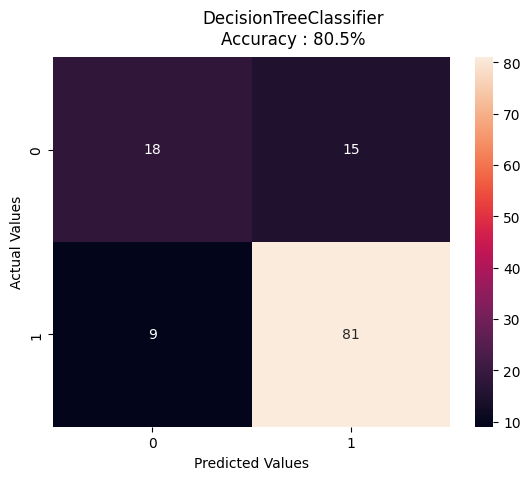

In [203]:
visualise(DT,y_predDT)

In [204]:
#Naive Byes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)




GaussianNB()

In [205]:
y_predNB = NB.predict(X_test)

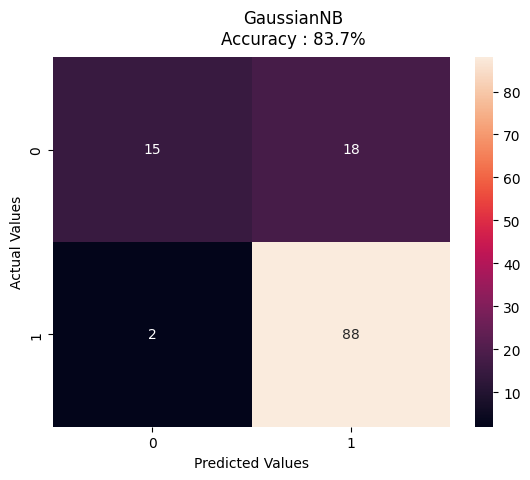

In [206]:
visualise(NB,y_predNB)

In [207]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RFparam = {
    'n_estimators': [10,20, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15,20],
    'bootstrap': [True, False]}
RF_Best_params = hyperPMTuning(RF,RFparam)
RF_Best_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 15,
 'n_estimators': 20}

In [208]:
RF = RandomForestClassifier(bootstrap=RF_Best_params['bootstrap'],criterion=RF_Best_params['criterion'],max_depth=RF_Best_params['max_depth']
                           ,min_samples_split=RF_Best_params['min_samples_split'],n_estimators=RF_Best_params['n_estimators'],random_state=0)

In [209]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=15,
                       n_estimators=20, random_state=0)

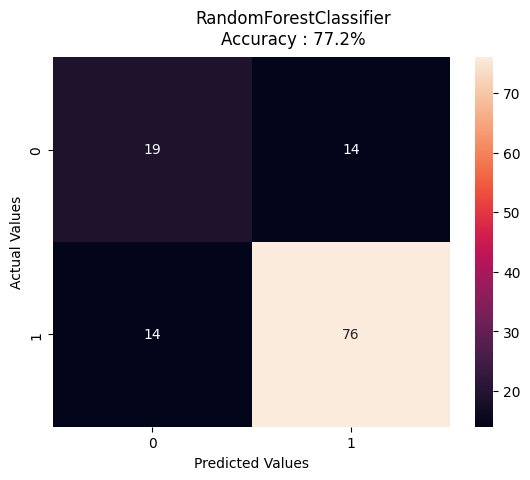

In [210]:
y_predRF = RF.predict(X_test)
visualise(RF,y_predRF)

In [211]:
testdata = pd.read_csv("loan_dataset/loan-test.csv")
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [212]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [213]:
testdata.dropna(inplace=True)
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [214]:
testdata.shape

(289, 12)

In [215]:
testdata["LoanAmount_log"] = np.log(testdata['LoanAmount'])
testdata
testdata["TotalIncome"] = testdata['ApplicantIncome']+testdata["CoapplicantIncome"]

In [216]:
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban,4.595120,4436
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393


In [217]:
test = testdata
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],inplace=True,axis=1)

In [218]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,360.0,1.0,Urban,4.700480,5720
1,LP001022,Male,Yes,1,Graduate,No,360.0,1.0,Urban,4.836282,4576
2,LP001031,Male,Yes,2,Graduate,No,360.0,1.0,Urban,5.337538,6800
4,LP001051,Male,No,0,Not Graduate,No,360.0,1.0,Urban,4.356709,3276
5,LP001054,Male,Yes,0,Not Graduate,Yes,360.0,1.0,Urban,5.023881,5587
...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,360.0,1.0,Semiurban,4.595120,4436
362,LP002971,Male,Yes,3+,Not Graduate,Yes,360.0,1.0,Urban,4.727388,5786
363,LP002975,Male,Yes,0,Graduate,No,360.0,1.0,Urban,4.744932,4867
365,LP002986,Male,Yes,0,Graduate,No,360.0,1.0,Rural,5.062595,7393


In [219]:
testInput = test.iloc[:,1:].values

In [220]:
pd.DataFrame(testInput)

,0,1,2,3,4,5,6,7,8,9
0,Male,Yes,0,Graduate,No,360.0,1.0,Urban,4.70048,5720
1,Male,Yes,1,Graduate,No,360.0,1.0,Urban,4.836282,4576
2,Male,Yes,2,Graduate,No,360.0,1.0,Urban,5.337538,6800
3,Male,No,0,Not Graduate,No,360.0,1.0,Urban,4.356709,3276
4,Male,Yes,0,Not Graduate,Yes,360.0,1.0,Urban,5.023881,5587
...,...,...,...,...,...,...,...,...,...,...
284,Male,Yes,1,Graduate,No,360.0,1.0,Semiurban,4.59512,4436
285,Male,Yes,3+,Not Graduate,Yes,360.0,1.0,Urban,4.727388,5786
286,Male,Yes,0,Graduate,No,360.0,1.0,Urban,4.744932,4867
287,Male,Yes,0,Graduate,No,360.0,1.0,Rural,5.062595,7393


In [221]:
for idx in range(0,6):
    testInput[:,idx]=encoder_x.fit_transform(testInput[:,idx])

testInput[:,7] = encoder_x.fit_transform(testInput[:,7])
    

In [222]:
testInput = scaler.fit_transform(testInput)


In [223]:
#Predicting using Naive Bayes Classifier since it showed the highest accuracy among the three classifiers
test_pred = NB.predict(testInput)
test_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])